In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cls(x):
    return (x[0] < 0.2) ^ (x[1] < 0.6)

def plot_cls(indicator):
    px = np.linspace(0, 1, 10)
    plt.plot(px, [0.6]*px.size, indicator)
    plt.plot([0.2]*px.size, px, indicator)

In [3]:
X = np.random.rand(1000,2)
y = cls(X.T)

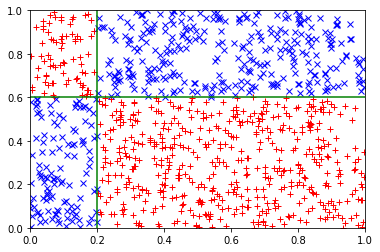

In [4]:
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot(X.T[0][y], X.T[1][y], 'r+')
plt.plot(X.T[0][np.logical_not(y)], X.T[1][np.logical_not(y)], 'bx')

plot_cls('g-')
plt.show()

In [5]:
import sklearn
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [6]:
X_test = np.random.rand(100,2)
y_test = cls(X_test.T)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
sklearn.metrics.accuracy_score(y_test, y_pred)

1.0

In [9]:
clf.score(X_test, y_test)

1.0

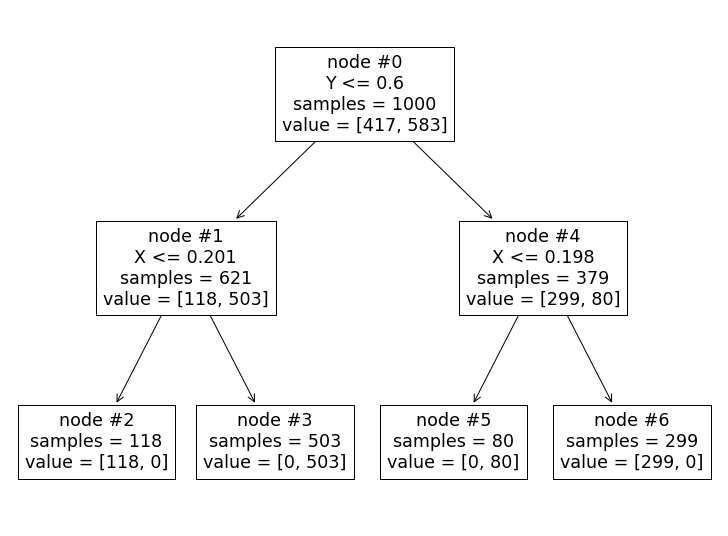

In [10]:
plt.figure(figsize=[12.8, 9.6])
tree.plot_tree(clf, max_depth=4, feature_names=["X", "Y"], impurity=False, node_ids=True)
None

In [11]:
import copy
def plot_rules(clf, indicator):
    rules = {}
    nodes = [[0,None, None]]
    while len(nodes) > 0:
        node, parent, direction = nodes.pop(0)
        if clf.tree_.children_left[node] >= 0:
            nodes.append([clf.tree_.children_left[node], node, 1])
        if clf.tree_.children_right[node] >= 0:
            nodes.append([clf.tree_.children_right[node], node, 0])

        if node == 0:
            rules[0] = [[0,1], [0,1], None, None]
            continue

        feature = clf.tree_.feature[parent]
        threshold = clf.tree_.threshold[parent]
        rule = copy.deepcopy(rules[parent])
        rule[feature][direction] = threshold
        rule[2] = threshold
        rule[3] = feature

        rules[node] = rule

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    for key in rules:
        rule = rules[key]
        if rule[2] is None:
            continue
        if rule[3] == 0:
            plt.plot([rule[2]]*2, rule[1], indicator)
        else:
            plt.plot(rule[0], [rule[2]]*2, indicator)

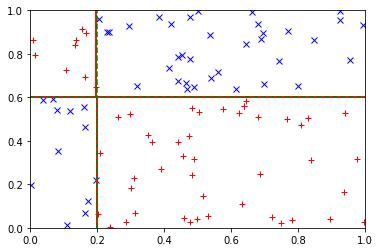

In [12]:
plt.xlim(0, 1)
plt.ylim(0, 1)

# Correctly classified
plt.plot(X_test.T[0][ y_test &  y_pred], X_test.T[1][ y_test &  y_pred], 'r+')
plt.plot(X_test.T[0][~y_test & ~y_pred], X_test.T[1][~y_test & ~y_pred], 'bx')

# Incorrectly classified
plt.plot(X_test.T[0][ y_pred & ~y_test], X_test.T[1][ y_pred & ~y_test], 'k.')
plt.plot(X_test.T[0][~y_pred &  y_test], X_test.T[1][~y_pred &  y_test], 'k.')

# Predicted Separator
plot_rules(clf, 'r-')

# Actual Separator
plot_cls('g--')

plt.show()